In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = "/Users/rakshangade/Downloads/chest_xray/chest_xray/train"
val_data = "/Users/rakshangade/Downloads/chest_xray/chest_xray/val"
test_data = "/Users/rakshangade/Downloads/chest_xray/chest_xray/test"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [4]:
img_size = (150, 150) 
batch_size = 32

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"   
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32,(3,3), activation="relu",input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2025-08-31 15:56:22.568197: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-08-31 15:56:22.568222: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-31 15:56:22.568228: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-31 15:56:22.568252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-31 15:56:22.568262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs=10,
    validation_data = val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10


2025-08-31 15:56:22.979177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 23s 140ms/step - loss: 0.5527 - accuracy: 0.7761 - val_loss: 0.5719 - val_accuracy: 0.6875
Epoch 2/10


2025-08-31 15:56:45.857389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 25s 152ms/step - loss: 0.2859 - accuracy: 0.9120 - val_loss: 0.2849 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 26s 162ms/step - loss: 0.2166 - accuracy: 0.9298 - val_loss: 0.7933 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 28s 174ms/step - loss: 0.1756 - accuracy: 0.9436 - val_loss: 0.6761 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 27s 163ms/step - loss: 0.1168 - accuracy: 0.9599 - val_loss: 0.2489 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 24s 148ms/step - loss: 0.1020 - accuracy: 0.9691 - val_loss: 0.4303 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 24s 148ms/step - loss: 0.0823 - accuracy: 0.9737 - val_loss: 0.3872 - val_accuracy: 0.8750
Epoch 8/10
163/163 [==============================] - 24s 147ms/step - loss: 0.0789 - accuracy: 0.9734 - val_loss: 0.3740 - val_accuracy: 0.8

In [8]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


20/20 [==============================] - 2s 112ms/step - loss: 1.9814 - accuracy: 0.7356
Test Accuracy: 0.7356
Test Loss: 1.9814


2025-08-31 16:00:41.632700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 88ms/step
              precision    recall  f1-score   support

      Normal       0.99      0.30      0.46       234
   Pneumonia       0.70      1.00      0.83       390

    accuracy                           0.74       624
   macro avg       0.84      0.65      0.64       624
weighted avg       0.81      0.74      0.69       624



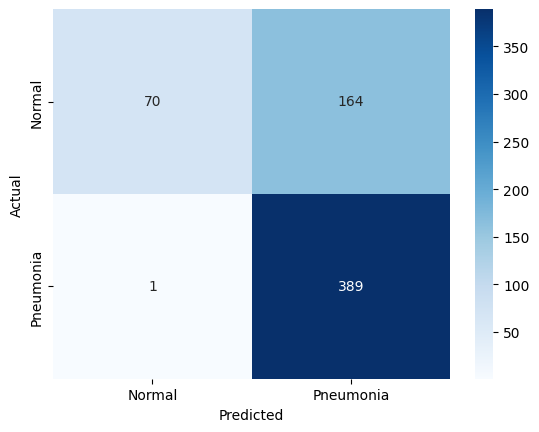

In [9]:
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=["Normal", "Pneumonia"]))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal","Pneumonia"], yticklabels=["Normal","Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop]
)


Epoch 1/20
163/163 [==============================] - 25s 155ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.3362 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 27s 167ms/step - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.3683 - val_accuracy: 0.9375
Epoch 3/20
163/163 [==============================] - 25s 150ms/step - loss: 0.0494 - accuracy: 0.9831 - val_loss: 1.3770 - val_accuracy: 0.6875
Epoch 4/20
163/163 [==============================] - 25s 153ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.6646 - val_accuracy: 0.8125


In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))



In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop]
)


Epoch 1/20


2025-08-31 16:02:28.704426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - ETA: 0s - loss: 0.6624 - accuracy: 0.6745

2025-08-31 16:03:06.538859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 39s 235ms/step - loss: 0.6624 - accuracy: 0.6745 - val_loss: 0.8974 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 39s 242ms/step - loss: 0.6112 - accuracy: 0.7176 - val_loss: 0.8399 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 39s 237ms/step - loss: 0.5890 - accuracy: 0.7312 - val_loss: 0.8462 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 38s 234ms/step - loss: 0.5718 - accuracy: 0.7350 - val_loss: 0.8452 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 38s 234ms/step - loss: 0.5626 - accuracy: 0.7352 - val_loss: 0.7845 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 39s 237ms/step - loss: 0.5479 - accuracy: 0.7395 - val_loss: 0.7732 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 38s 234ms/step - loss: 0.5446 - accuracy: 0.7398 - val_loss: 0.7943 - val_accuracy: 0.5

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [16]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [17]:
model.compile(optimizer=Adam(1e-5), loss="binary_crossentropy", metrics=["accuracy"])


In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(1e-5), loss="binary_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/20


2025-08-31 16:21:24.559867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8454

2025-08-31 16:21:52.844148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 36s 258ms/step - loss: 0.3333 - accuracy: 0.8454 - val_loss: 0.5639 - val_accuracy: 0.7459
Epoch 2/20
131/131 [==============================] - 33s 248ms/step - loss: 0.2221 - accuracy: 0.9118 - val_loss: 0.6144 - val_accuracy: 0.6683
Epoch 3/20
131/131 [==============================] - 34s 260ms/step - loss: 0.2095 - accuracy: 0.9164 - val_loss: 0.2904 - val_accuracy: 0.8533
Epoch 4/20
131/131 [==============================] - 54s 411ms/step - loss: 0.2001 - accuracy: 0.9197 - val_loss: 0.2790 - val_accuracy: 0.8878
Epoch 5/20
131/131 [==============================] - 67s 510ms/step - loss: 0.1937 - accuracy: 0.9238 - val_loss: 0.3320 - val_accuracy: 0.8495
Epoch 6/20
131/131 [==============================] - 74s 565ms/step - loss: 0.1903 - accuracy: 0.9257 - val_loss: 0.3552 - val_accuracy: 0.8370
Epoch 7/20
131/131 [==============================] - 57s 433ms/step - loss: 0.1907 - accuracy: 0.9226 - val_loss: 0.1691 - val_accuracy: 0.9

In [21]:
model.save("pneumonia_resnet50.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
